## <font color='#1D76BA'>Integrated CA1 - Sem 2 MSc in Data Analytics<font color='#00A859'>
### <font color='#'>**Advanced Data Analytics  & Big Data Storage and Processing**
### <font color='#1ABC9C'>**Lecturer(s): David McQuaid and Muhammad Iqbal**
------
<font color='#E74C3C'>**Students Name / ID** // Rosilene Francisca da Silva - 2021090

## Business Understanding


### "Using Neural Networks and Big Data Analytics to Predict E-commerce Revenue Generation: A Look at Visitor Type Dynamics"

Research Questions:

** What are the key features that influence e-commerce revenue generation for different visitor types, and how can neural networks combined with big data processing reveal these factors?

(This question seeks to identify and analyse the features that have a significant impact on revenue generation, with a focus on how they differ between visitor types and how neural networks can detect these patterns.)

 

** What are the limitations and challenges of using neural networks to analyse big data in e-commerce, and how can they be overcome?

(This investigates the practical challenges of deploying neural networks in a big data environment, particularly in the e-commerce sector, and proposes solutions to these challenges.)

## Data Understanding and Preparation

#### Dataset: Online Shoppers Purchasing Intention Dataset
Donated on 8/30/2018

The dataset was researched on the The UCI Machine Learning Repository website: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset that CSV file was downloaded onto Python.

Dataset Information
Additional Information

The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. 

Creators
C. Sakar
Yomi Kastro - DOI: 10.24432/C5F88Q

#### License
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

Reference: 'Sakar,C. and Kastro,Yomi. (2018). Online Shoppers Purchasing Intention Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.'

### Importing the required libraries and Loading the dataset

In [ ]:
#pip install --upgrade matplotlib

In [47]:
#Importing the essential libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import cm

%matplotlib inline

#Warnings: It can handle alert and warning messages with a number of commands and functions.
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Command to display all columns in the file.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Load the Dataset, first using Pandas
shopperintents_df = pd.read_csv('online_shoppers_intention.csv')

In [5]:
shopperintents_df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [6]:
shopperintents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

There are eight categorical and ten numerical attributes in the dataset. The class label can be set to the 'Revenue' attribute.

In [7]:
shopperintents_df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [8]:
shopperintents_df.shape

(12330, 18)

### Data Cleaning and Preprocessing

#### Check for missing values

In [9]:
onlinenull = shopperintents_df.isna().sum().sum()
print ('Null values in shopperintents: {}'.format(onlinenull))

Null values in shopperintents: 0


#### Statistics:

Gain an understanding of the data's central tendencies and dispersion.

#### Summary statistics for numerical columns

In [10]:
shopperintents_df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

The dataset includes 12,330 sessions, which provides a solid foundation for statistical inference regarding online shopping behaviour.
The data fields address many aspects of user contact, including administrative, informative, and product-related activities, as well as their length. In addition, engagement metrics like as bounce and exit rates, as well as page values, are included, providing a comprehensive picture of user involvement.

Administrative and informational engagement:

Administrative Actions: A mean of roughly 2.32 with a standard deviation of 3.32 indicates low to moderate engagement in administrative duties, with broad variation between sessions. The maximum score suggests that some sessions include a high level of administrative interaction.
Informational Actions: The average value is close to 0.5, and the high standard deviation relative to the mean suggests that, while most sessions have no informational activities, a few have much more, indicating a range of user intent.

Product Related Engagement:

Product-related pages have higher user engagement (mean 31.73). However, the high standard deviation (44.48) and maximum value (705) indicate significant variability in user interactions.
The average product-related length is fairly long (1194.74 seconds), with a wide range in the data, indicating sessions in which consumers spend a large amount of time, possibly indicating focused purchasing intent.

Engagement metrics:
Bounce Rates: The low average bounce rate of 0.022 suggests that most sessions involve several page interactions, which is a good sign of user involvement.
Exit Rates: Although somewhat higher on average (0.043) than bounce rates, the exit rate variance is modest, indicating a consistent pattern of user exit behaviour across sessions.

Value metrics:
Page Values: With a mean of 5.89 and a huge standard deviation, page value (income production) fluctuates greatly, demonstrating that while many pages do not directly contribute to revenue, a few are extremely effective.

Technical and temporal features:

SpecialDay: The data primarily covers non-special days, as evidenced by the low mean and the 75th percentile remaining at zero.
The selection of operating systems and browsers utilised reflects the user base's technological variety.

Inferential insights:

A considerable majority of sessions have no informational or administrative actions, as seen by the 50th percentile (median) values being zero. This could indicate that a substantial portion of users are primarily interested in product discovery or purchase.
The range in lengths reflects varying levels of user engagement, which may be influenced by factors such as user purpose, website usability, and product diversity.
Outliers in many metrics, particularly durations and page values, require more analysis to uncover high-value user segments or sessions that depart from regular interaction patterns.

Limitations and considerations:

Summary data do not disclose the causality or predictive potential of these variables in terms of income production, necessitating the use of more advanced analytical models.

#### Summary statistics for categorical columns

In [11]:
print(shopperintents_df.describe(include='object'))

        Month        VisitorType
count   12330              12330
unique     10                  3
top       May  Returning_Visitor
freq     3364              10551


###  Exploratory Data Analysis (EDA) 
EDA entails comprehending and visualising the dataset in order to uncover patterns and insights.

####  Visualise the distribution of numerical features to better understand their shape, spread, and the presence of outliers.

### Single-variable analysis

For numerical and categorical variables:

#### Numeric Features

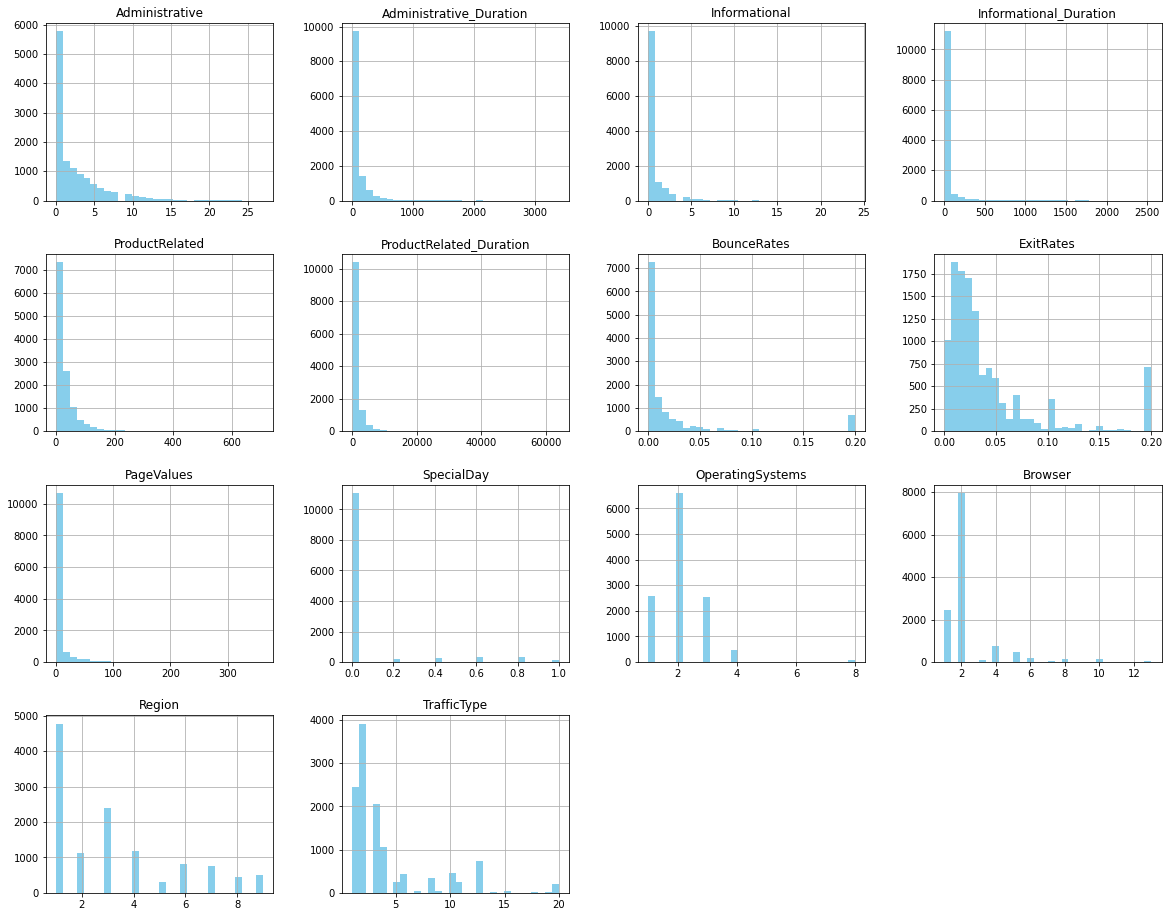

In [12]:
shopperintents_df.hist(bins=30, color = "skyblue", figsize=(20,16))
plt.show()

Some insights from histograms:
- Skewness: The majority of the features appear to have a right-skewed distribution, which means there are more occurrences near the bottom of the scale and fewer as the value rises. This is typical of count data and time spent, with many sessions having modest counts or durations and only a few having extremely high values.
- Bimodal/Multimodal Distributions: If a histogram contains several peaks, it indicates that the data may be divided into various categories. For example, two peaks could suggest two distinct types of visitor behaviours.
- Outliers: Long tails extending to the right in several distributions indicate the presence of outliers. These could be due to unusually high readings that require more research to verify whether they are genuine or the result of data entering errors.
- Common Values: Histograms with spikes at the beginning may imply a high number of zeros or low values in certain features. For example, many viewers may not engage with 'Informational' material or simply view a few pages, resulting in a spike at the lower end of the histogram.
- Potential for Feature Engineering: The variation in these traits may be useful for predictive modelling. For example, features with a larger range of values may have more discriminative power than those with a tight spread.
- Need for Data Transformation: Because of the skewness, adding a transformation such as log or square root could normalise these features and potentially improve the performance of specific algorithms.
- Sparsity of Data: For some aspects, the concentration of values at the lower end of the scale may indicate that the data is sparse, influencing how models interpret the importance of these features.

Given the skewness of multiple features, suitable data transformations or non-parametric statistical approaches may be required for further research.

#### Categorical Features

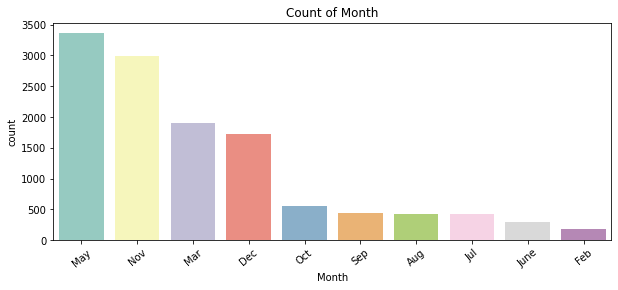

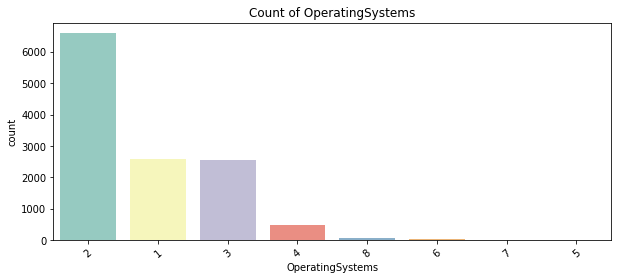

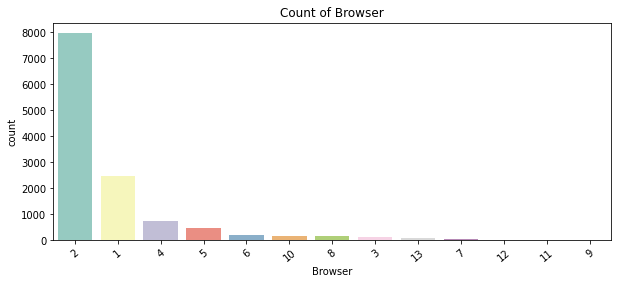

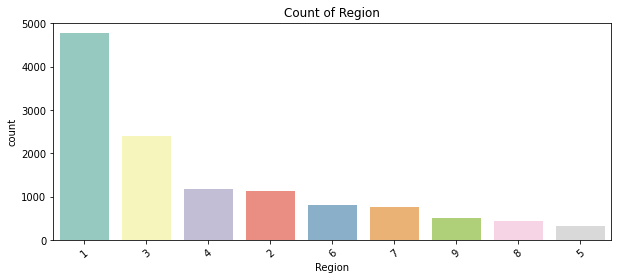

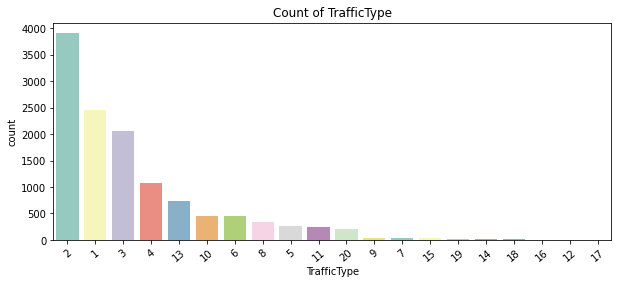

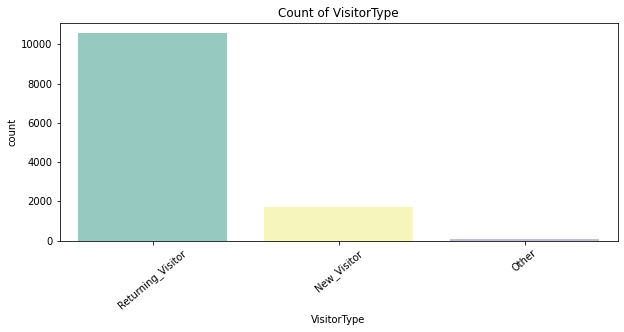

In [13]:
categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=shopperintents_df[feature], order = shopperintents_df[feature].value_counts().index, 
                 palette='Set3')
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=40)
    plt.show()

The histogram shows a significant concentration of values at the lower end, indicating a strongly right-skewed distribution. 

### Bivariate Analysis.

#### Relationship Between Features and Target Variable
Investigate how various features relate to the target variable `Revenue`.

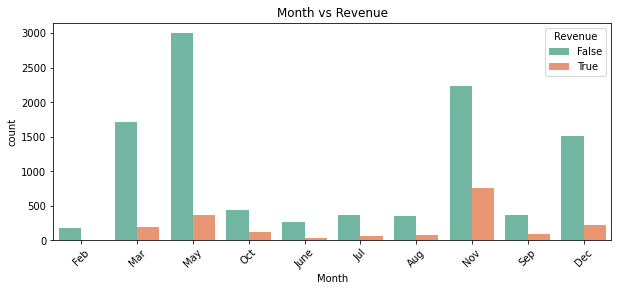

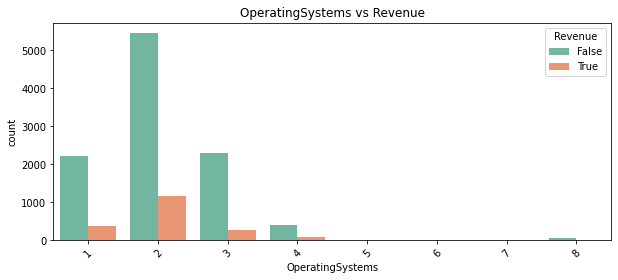

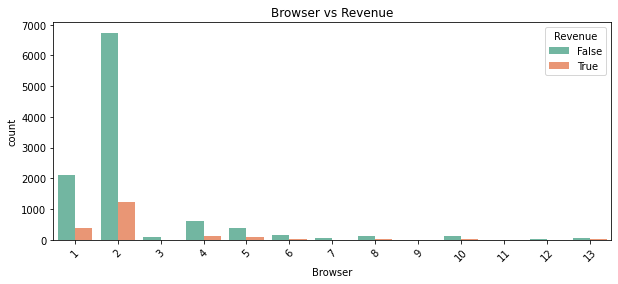

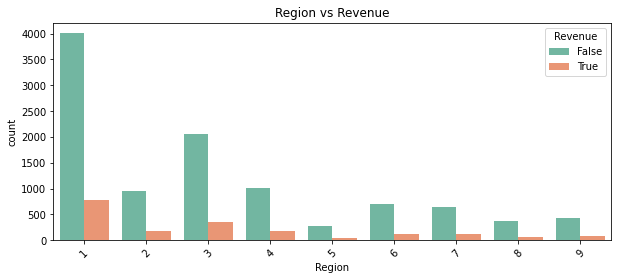

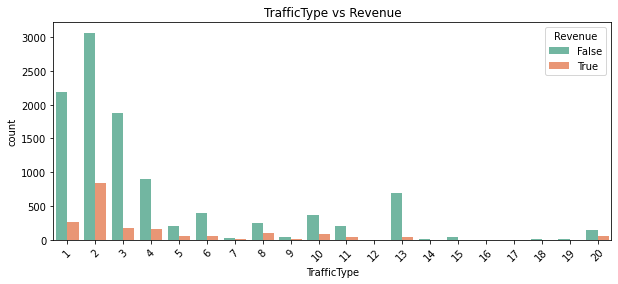

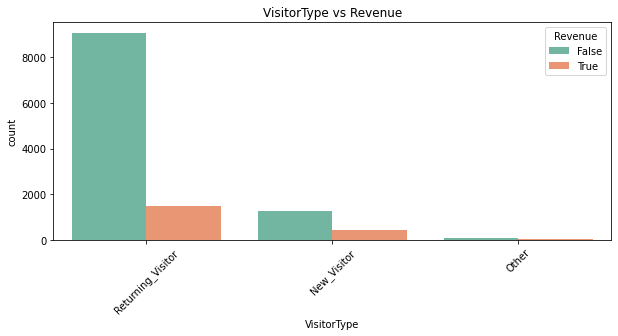

In [14]:
# Categorical features vs. Revenue
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, palette = 'Set2', hue='Revenue', data=shopperintents_df)
    plt.title(f'{feature} vs Revenue')
    plt.xticks(rotation=45)
    plt.show()

#### Numeric features vs. Revenue

In [15]:
#pip install --upgrade seaborn matplotlib pandas numpy

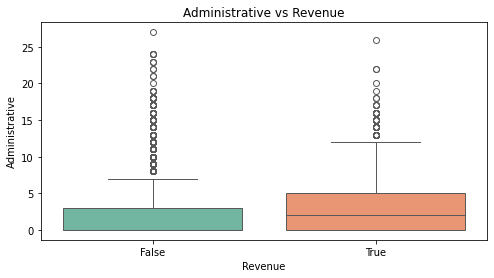

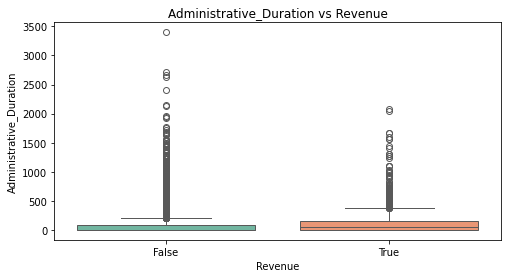

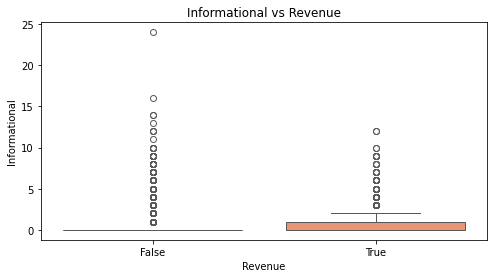

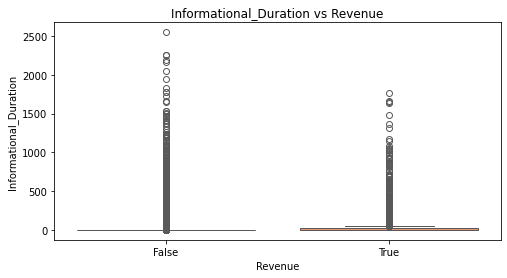

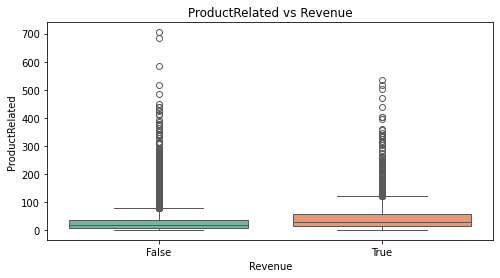

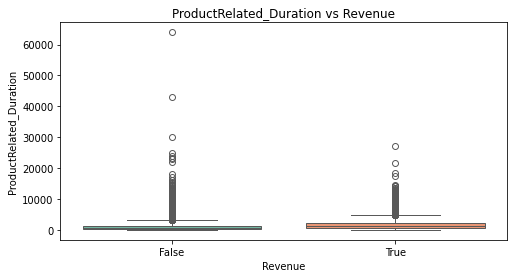

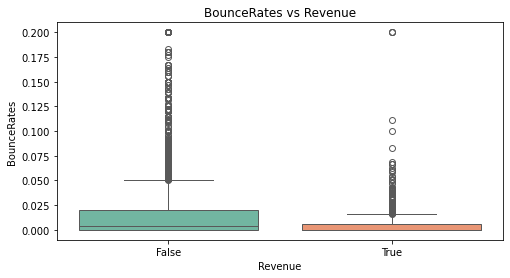

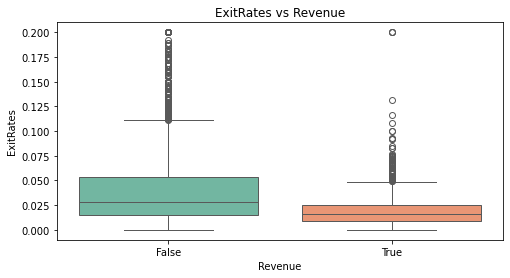

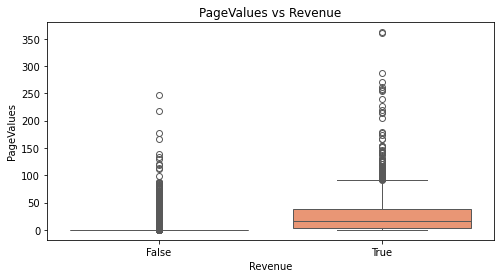

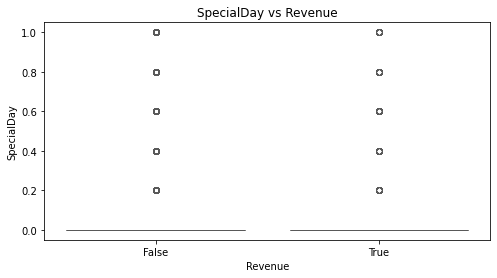

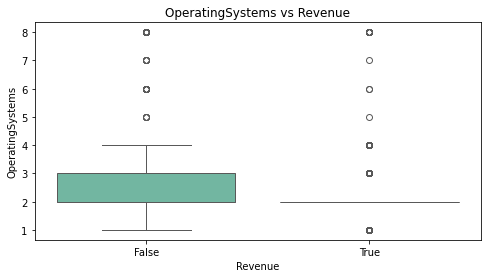

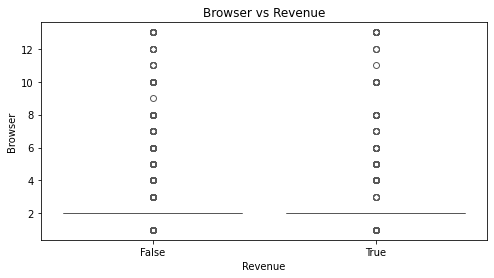

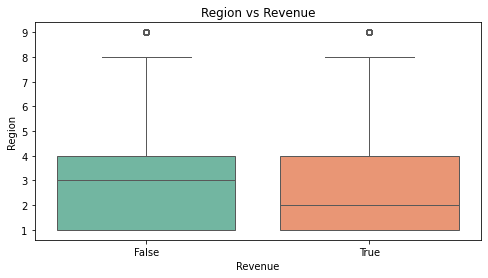

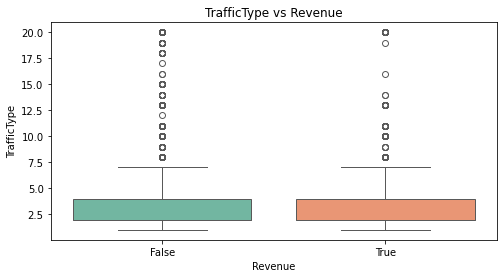

In [16]:
#Define 'numeric_features' as a list of names of numeric columns you want to analyze
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational', 
                    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 
                    'OperatingSystems', 'Browser', 'Region', 'TrafficType']

for feature in numeric_features:
    # Create a temporary DataFrame with just the current feature and 'Revenue' converted to string for plotting purposes
    temp_df = shopperintents_df[[feature]].copy()
    temp_df['Revenue'] = shopperintents_df['Revenue'].astype(str)
    
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Revenue', y=feature, data=temp_df, palette='Set2')
    plt.title(f'{feature} vs Revenue')
    plt.show()

#### VisitorType Breakdown

In [17]:
# Check unique values in 'Revenue'
print(shopperintents_df['Revenue'].unique())

[False  True]


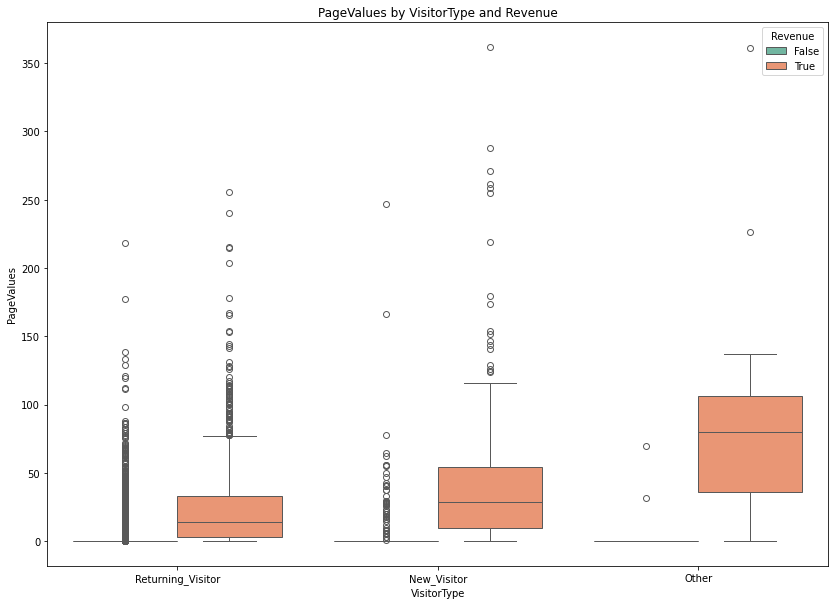

In [18]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='VisitorType', y='PageValues', palette = 'Set2', hue='Revenue', data=shopperintents_df)
plt.title('PageValues by VisitorType and Revenue')
plt.show()

#### Bar plot for visitor types against the target

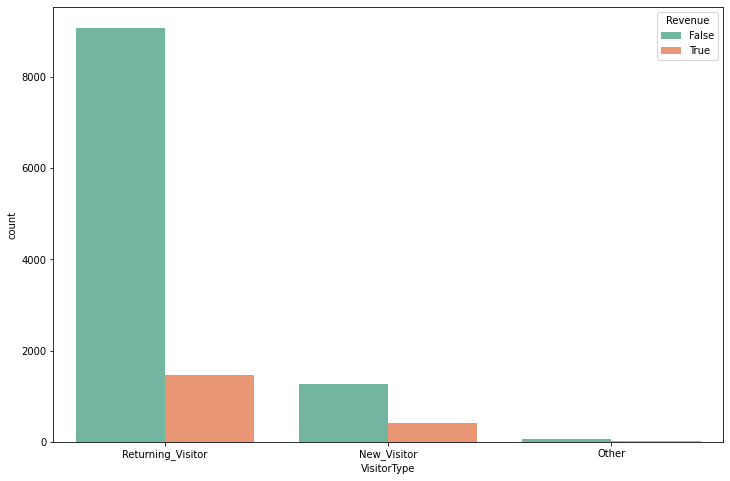

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(x='VisitorType', palette = 'Set2', hue='Revenue', data=shopperintents_df)
plt.show()

#### Visitor Type Distribution 

In [20]:
shopperintents_df ['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

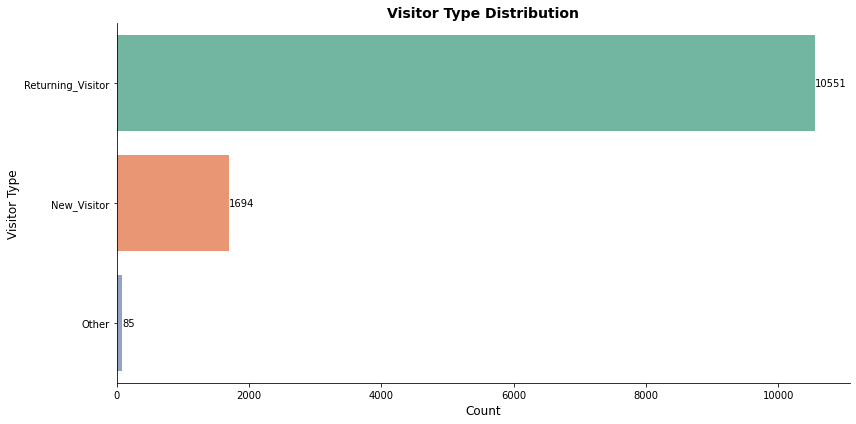

In [21]:
# Create a countplot with seaborn
plt.figure(figsize=(12, 6))
sns.countplot(data=shopperintents_df, y='VisitorType', order=shopperintents_df['VisitorType'].value_counts().index, 
              palette='Set2')
sns.despine()  # Remove the top and right spines

# Add annotations to each bar for clarity
for i, value in enumerate(shopperintents_df['VisitorType'].value_counts().values):
    plt.text(value, i, f'{value}', va='center')

# Title and labels
plt.title('Visitor Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Visitor Type', fontsize=12)
plt.tight_layout()
plt.show()

The bar chart shows the distribution of visitor types in an e-commerce dataset. It shows that the most popular category is 'Returning_Visitor', with a total of 10,551 instances, indicating a large number of users who return to the platform. In contrast, there are significantly fewer 'New_Visitors', totaling 1,694, reflecting the influx of first-time users to the website. The 'Other' category is small, with only 85 entries, implying that it is a residual category for visitors who do not fit into the standard classifications. The data visualisation reveals a significant difference in the number of returning and new visitors, emphasising the platform's visitor dynamics.

#### Check the distribution of the 'Revenue' attribute, which can be used as a class label

In [22]:
shopperintents_df ['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

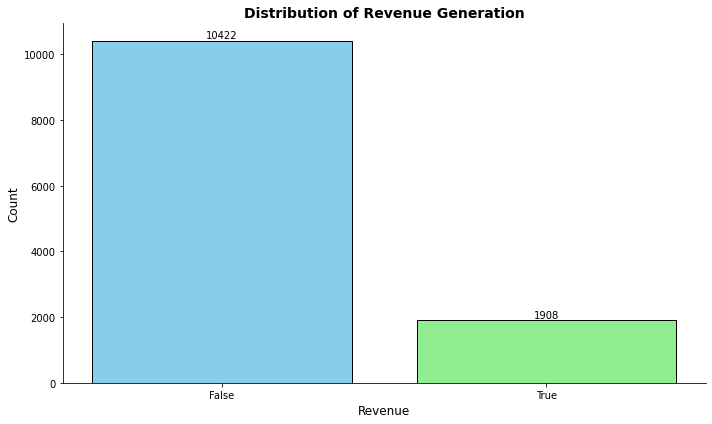

In [23]:
import matplotlib.pyplot as plt

# Calculate the counts for the Revenue True/False
revenue_counts = shopperintents_df['Revenue'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
bars = ax.bar(revenue_counts.index.astype(str), revenue_counts.values, color=['skyblue', 'lightgreen'], 
              edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.tick_params(top=False, right=False)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')
ax.set_title('Distribution of Revenue Generation', fontsize=14, fontweight='bold')
ax.set_xlabel('Revenue', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

The dataset is imbalanced. The graph clearly state that the dataset demonstrates a significant imbalance between the two classes. Note the exact count for each class (10,422 for 'False' and 1,908 for 'True', as indicated by the bars). 
It's represent approximately 84.53% of the instances are classified as 'False', indicating no revenue was generated and 15.47% of the instances are classified as 'True', meaning revenue was generated in these cases.

This imbalance is an important factor to consider when developing predictive models because it can affect model performance and necessitate the use of specific techniques to address data skewness. 

In [24]:
#pip install plotly

In [25]:
import plotly.express as px

# Define the color map to use specific colors for true and false values.
color_map = {"False": 'darkblue', 
             "True": 'lightgrey'}   

# Create the box plot
fig = px.box(shopperintents_df, x='VisitorType', y='ProductRelated_Duration', color='Revenue',
             color_discrete_map=color_map)
fig.update_traces(quartilemethod="inclusive")  # or "inclusive", or "linear" by default
fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',  
    'paper_bgcolor': 'rgba(0,0,0,0)', 
    'showlegend': True,})

fig.update_xaxes(showgrid=False, zeroline=False)  
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', zeroline=False) 

# Remove axis ticks and labels if they do not add to the understanding of the plot
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_layout(title='ProductRelated Duration by Visitor Type and Revenue',
                  xaxis_title='Visitor Type',
                  yaxis_title='Product Related Duration',
                  font=dict(family="Sans-serif", size=12, color="black"))
fig.show()

#### Correlation Matrix with Heatmap
Understand how numerical features relate to one another.

Select only the columns with data types int64 and float64, which should be the dataset's numerical columns, to avoid an error triggered by attempting to include categorical or non-numeric data types in the correlation calculation and calculate the correlation matrix based on these columns only. Let's plot the heatmap of the correlation matrix. 

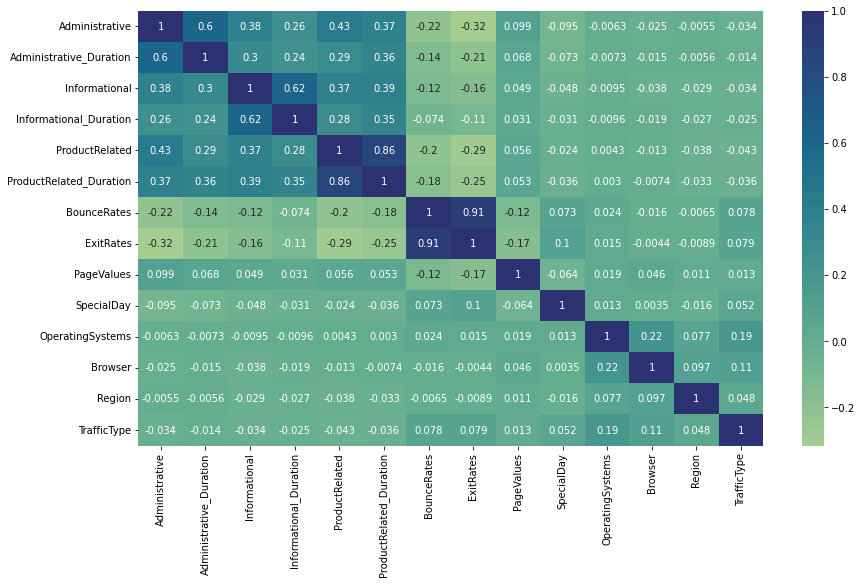

In [26]:
numerical_df = shopperintents_df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(14, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap="crest")
plt.show()

Correlation coefficients range from -1 to 1, with 1 indicating a perfect positive linear relationship, -1 indicating a perfect negative linear relationship, and zero indicating no linear relationship between the variables.

- Positive Correlations: Several pairs of features show moderately strong positive correlations with one another. `Administrativ` e and `Administrative_Duration`, for instance, exhibit a positive correlation, indicating that sessions with a higher number of views on administrative pages typically have longer sessions on those pages. In a similar vein, `ProductRelated` and `ProductRelated_Duration` show positive correlations with each other, meaning that the amount of time spent on each page rises with the number of page views in each category.

- Negative Correlations between `Bounce` and `Exit Rates`: It is suggested that sessions with higher levels of engagement in terms of page views and duration typically have lower bounce and exit rates. Bounce and exit rates are negatively correlated with a number of features, including `Administrative`, `Informational`, and `Product-Related` features.

- Correlation with Revenue-Generating Behaviour: Although the heatmap does not explicitly display the relationship between `revenue` and features, one would anticipate that features like `PageValues`, which indicate the page's value in relation to completed transactions, would positively correlate with revenue generation.

- Lack of Strong Correlation with Technical Features: This dataset's behavioural metrics are not strongly correlated with technical features, such as `operating systems` and `browsers`, which exhibit very low correlations with other features.

Finally, the heatmap indicates that engagement metrics, such as the number of pages visited and the duration of visits within different page categories, are linked and inversely related to bounce and exit rates.

### Correlation Heatmap

To analyze it without changing the whole DataFrame, let's concatenate these new DataFrames with the original one as needed:

In [27]:
# One-Hot Encoding for 'Month' and 'VisitorType'
correlation_df = pd.get_dummies(shopperintents_df, columns=['Month', 'VisitorType'])

Choosing the appropriate encoding method for the Month and VisitorType variables in this dataset is heavily influenced by the variables' nature and the context of the analysis or modelling objectives. The reasons why One-Hot Encoding was chosen are: 
For `VisitorType`feature, One-Hot Encoding is a superior option since it truly portrays the nature of the data by treating each visitor type as a separate category without enforcing any order. Also for `month' feature One-Hot Encoding can preserves nominal nature without indicating an ordinal relationship. However, it does not directly reflect the cyclical character of months.

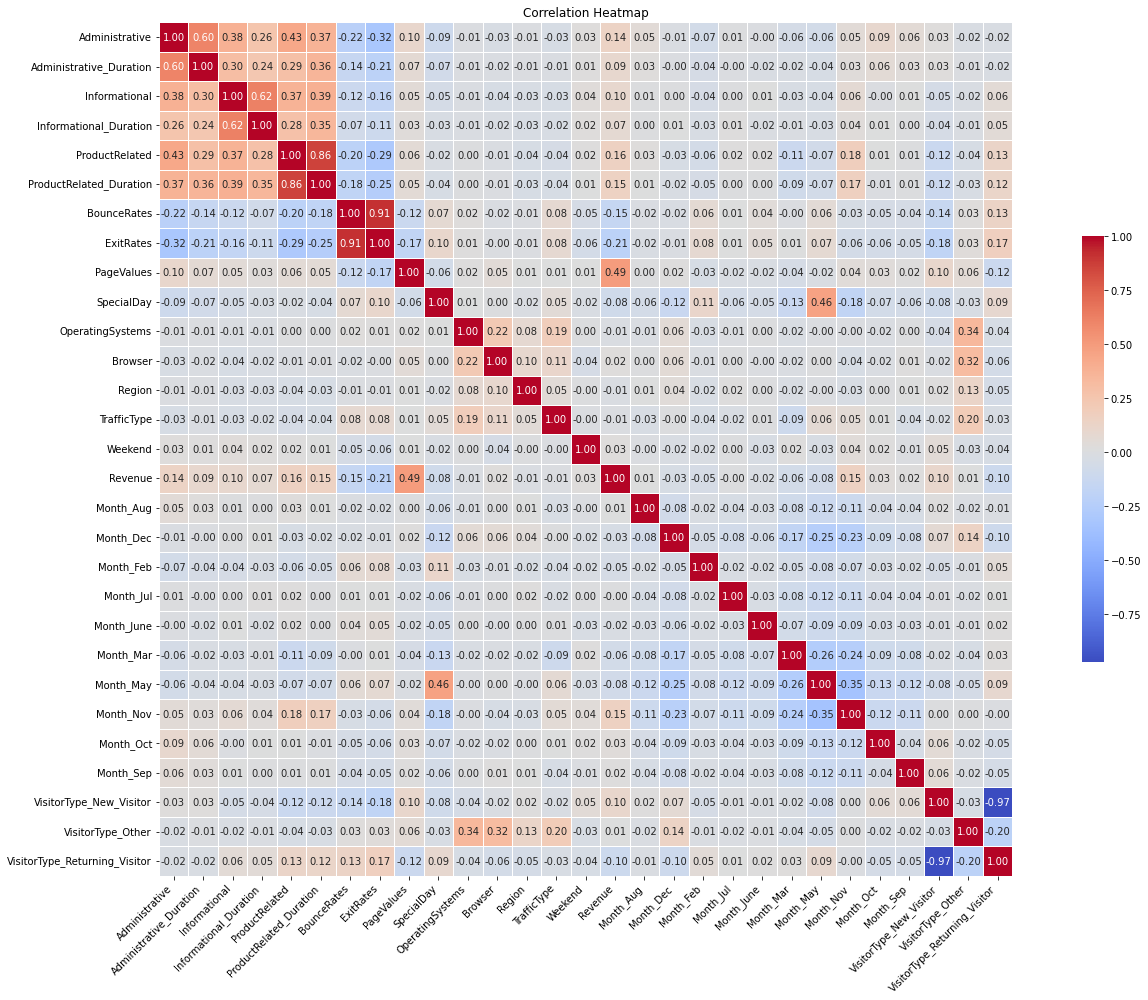

In [28]:
# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 14))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .5}, square=True, linewidths=.5)

plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()  
plt.show()

This heatmap visualises the correlation coefficients between the dataset's various attributes. It is useful to understand not just how various features relate to revenue, but also how they relate to one another.

- Key Correlation Analysis:
High Positive correlation: There is a moderate to high positive correlation between the Administrative, Informational, and Product-Related variables and their respective duration features (Administrative_Duration, Informational_Duration, and ProductRelated_Duration). This may suggest that users are more likely to contribute to the revenue if they interact with the material (on different kinds of pages) more.

The data indicates that there is a moderate negative association between Bounce Rates and ProductRelated and ProductRelated_Duration. This implies that visitors with lower bounce rates are likely to be more engaged with product-related content, which could result in revenue.

Revenue and Exit Rates: There is a strong negative correlation between Exit Rates and Revenue, which suggests that the possibility of making money declines as the rate at which users depart the website rises.

Page Values: Page values have a strong positive link with revenue, supporting the notion that more valuable pages contribute significantly to income production.

Month and Revenue: November has a significant positive link with revenue, which could be due to Christmas shopping in many locations, particularly through events such as Black Friday and Cyber Monday. Other months, such as May and March, also exhibit a positive link, but less prominent.

Visitor Type: VisitorType_New_Visitor is positively correlated with Revenue, while VisitorType_Returning_Visitor is slightly negatively correlated. This could imply that new visitors are more likely to make a purchase, or that marketing campaigns to attract new visitors are effective.

- Considerations for Further Analysis:

Collinearity: Certain features are closely connected with one another. For example, ProductRelated and ProductRelated_Duration exhibit a strong correlation, which is to be expected given that more product-related pages are likely to result in longer visits to the website. This collinearity should be considered while developing prediction models to minimise overfitting.

Heatmap Interpretation: The color-coded scale allows you to rapidly discover strong correlations; warmer colours (red) indicate positive correlations, while cooler colours (blue) suggest negative correlations.

Causation: As with other correlation analyses, it's crucial to note that correlation does not imply causation. Additional study, such as causal inference models, could help to clarify the direction of the associations observed here.

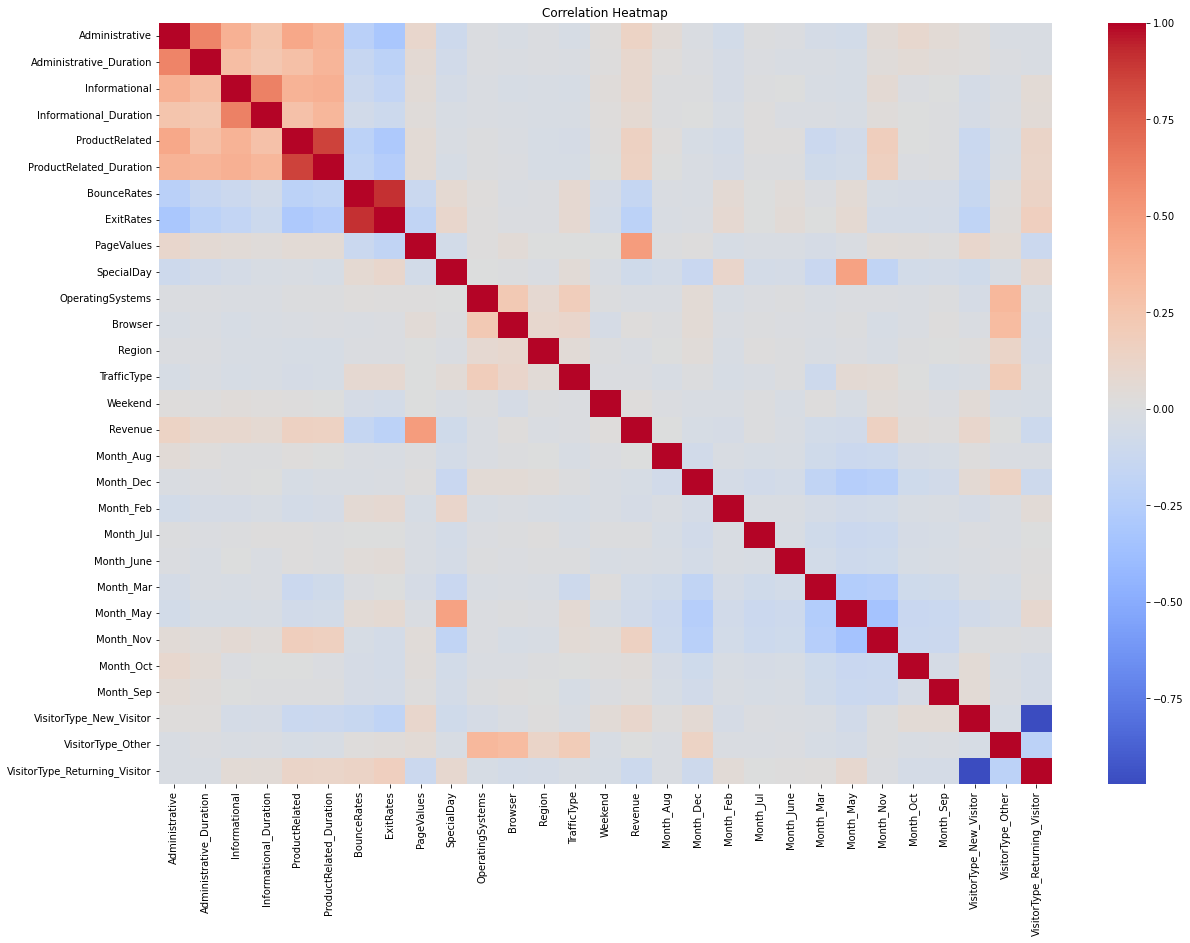

In [29]:
# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Improving the plot as per Tufte's principles
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

#### Calculate correlations. Specifically with the 'Revenue' feature and display it.
Plotting these connections in a bar chart, which shows how each feature interacts with revenue. This concentrated method emphasises the relationship between individual features and the target variable, making it easier to determine which features provide the best predictive signals.

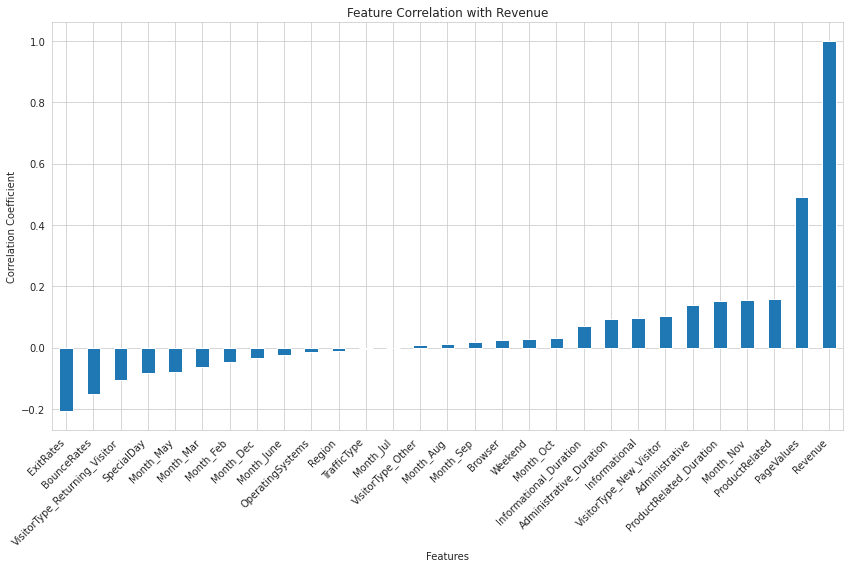

In [30]:
# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Extracting correlations specifically with 'Revenue'
correlation_with_revenue = correlation_matrix['Revenue'].sort_values()

# Plotting the correlations with 'Revenue'
plt.figure(figsize=(12, 8))

sns.set_style("whitegrid")
correlation_with_revenue.plot(kind='bar')
plt.title('Feature Correlation with Revenue')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha="right") 
plt.tight_layout()
plt.show()

This bar plot shows how several variables correlate with the Revenue target variable. 

Features such as `ExitRates` and `BounceRates` have *negative associations* with revenue. This implies that when these parameters increase, the likelihood of a transaction diminishes. It makes obvious sense, as greater exit and bounce rates often signal less interaction with the website, perhaps leading to fewer conversions.

Positive Correlations: On the other hand, `PageValues` has a significant positive association with Revenue. This means that when the page value, which is a measure of how valuable a page is in terms of conversion, rises, so does the possibility of a transaction. This could indicate that focusing on high-value sites is a good strategy for growing revenue.

Weak or No Correlation: Many attributes have extremely weak positive or negative correlations with revenue. When viewed individually, these factors may not have a significant impact on revenue prediction. However, they may still provide useful information when combined with other features in a prediction model.

### Creating a pair plot.
A pair plot (or scatterplot matrix) is useful for displaying all pairwise associations, as well as the distribution of each variable along its diagonal. This figure can be fairly complex, thus in accordance with Tufte's principles, we attempt for clarity by limiting the amount of variables included in the plot.

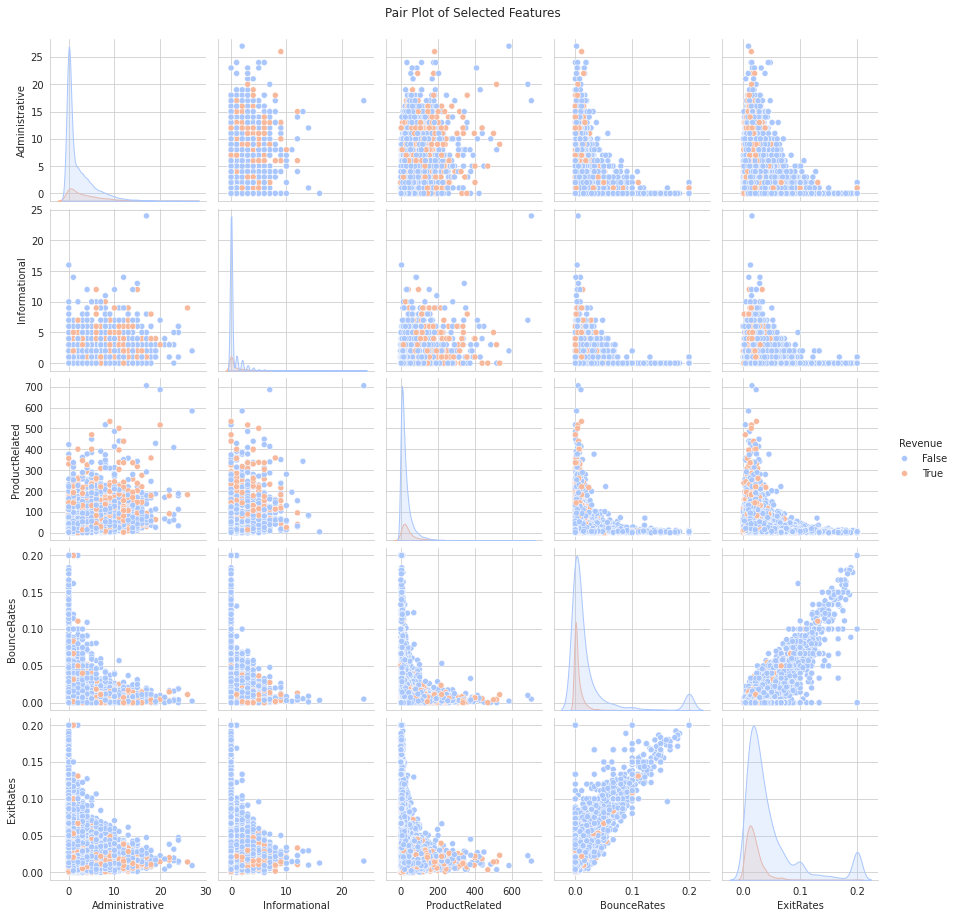

In [31]:
# Select a subset of numerical columns for clarity
columns_to_plot = ['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'Revenue']

# Create a pair plot
sns.pairplot(correlation_df[columns_to_plot], hue='Revenue', palette='coolwarm', diag_kind='kde')

plt.suptitle('Pair Plot of Selected Features', y=1.02)  
plt.show()

Diagonal Histograms and Density Plots:

Administrative, informational, and product-related: The histograms along the diagonal depict the distribution of page visits for each page type. The distributions are right-skewed, implying that most visitors only interact with these pages a few times, but there are some outliers with extremely high interaction.
BounceRates, ExitRates: The distributions for both bounce and exit rates are right-skewed, with numerous cases grouped at the bottom of the scale.

Scatter plots:

Revenue vs. Page Types: When comparing Administrative, Informational, and ProductRelated page visits with Revenue, it seems that higher levels of engagement (more visits) have a higher incidence of transactions (Revenue True). However, there are still numerous cases where increased page views do not result in money, implying that while engagement is a positive indicator, it does not ensure revenue on its own.

Revenue vs. BounceRates/ExitRates: The scatter plots for BounceRates and ExitRates show a concentration of Revenue True points at lower rates, supporting the notion that visitors who are less likely to abandon the site immediately or navigate away from it contribute more to revenue.

Some insights:
Engagement: The data demonstrates a general pattern in which increasing engagement (measured by page views) correlates with a higher likelihood of income generation. Marketing methods that successfully engage users may result in greater sales.

Bounce/Exit Rates: There is a clear trend where transactions become less frequent as bounce and exit rates rise. This emphasises the value of a sticky and engaging web design that invites users to remain and investigate.

Outliers: There are engagement outliers with a large number of page visits. These situations may be worth exploring to determine whether they represent a distinct user category or are the consequence of data errors.

Non-Linear Patterns: Some charts suggest non-linear interactions that would be better portrayed using more complex models than basic correlations.

Additional Segmentation: Dividing the analysis by different visitor kinds or segmenting people based on behaviour may yield more sophisticated insights.

#### Read the dataset in the Notebook using PySpark
To perform the analysis, read the dataset from HDFS using PySpark.  

#### Verify PySpark installation

In [32]:
#pip show pyspark

In [33]:
import sys
print(sys.executable)

/usr/bin/python3


In [34]:
import pyspark
print(pyspark.__version__)

3.4.2


In [35]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Online Shoppers Intention Analysis") \
    .getOrCreate()

# Load the dataset from HDFS
shopperintents_df = spark.read.csv('hdfs://localhost:9000/user/hduser/data/online_shoppers_intention.csv', 
                                   header=True, inferSchema=True)
shopperintents_df.show(5, truncate=False)

24/03/28 17:31:40 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+---------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+-------+
|Administrative|Administrative_Duration|Informational|Informational_Duration|ProductRelated|ProductRelated_Duration|BounceRates|ExitRates|PageValues|SpecialDay|Month|OperatingSystems|Browser|Region|TrafficType|VisitorType      |Weekend|Revenue|
+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+---------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+-------+
|0             |0.0                    |0            |0.0                   |1             |0.0                    |0.2        |0.2      |0.0       |0.0       |Feb  |1               |1      |1     |1          |Returning_Visitor|false  |false  |
|0             |0.0 

In [36]:
shopperintents_df.take(5)

[Row(Administrative=0, Administrative_Duration=0.0, Informational=0, Informational_Duration=0.0, ProductRelated=1, ProductRelated_Duration=0.0, BounceRates=0.2, ExitRates=0.2, PageValues=0.0, SpecialDay=0.0, Month='Feb', OperatingSystems=1, Browser=1, Region=1, TrafficType=1, VisitorType='Returning_Visitor', Weekend=False, Revenue=False),
 Row(Administrative=0, Administrative_Duration=0.0, Informational=0, Informational_Duration=0.0, ProductRelated=2, ProductRelated_Duration=64.0, BounceRates=0.0, ExitRates=0.1, PageValues=0.0, SpecialDay=0.0, Month='Feb', OperatingSystems=2, Browser=2, Region=1, TrafficType=2, VisitorType='Returning_Visitor', Weekend=False, Revenue=False),
 Row(Administrative=0, Administrative_Duration=0.0, Informational=0, Informational_Duration=0.0, ProductRelated=1, ProductRelated_Duration=0.0, BounceRates=0.2, ExitRates=0.2, PageValues=0.0, SpecialDay=0.0, Month='Feb', OperatingSystems=4, Browser=1, Region=9, TrafficType=3, VisitorType='Returning_Visitor', Weekend

In [37]:
type(shopperintents_df)

pyspark.sql.dataframe.DataFrame

In [38]:
shopperintents_df.count()

12330

In [39]:
shopperintents_df.printSchema()

root
 |-- Administrative: integer (nullable = true)
 |-- Administrative_Duration: double (nullable = true)
 |-- Informational: integer (nullable = true)
 |-- Informational_Duration: double (nullable = true)
 |-- ProductRelated: integer (nullable = true)
 |-- ProductRelated_Duration: double (nullable = true)
 |-- BounceRates: double (nullable = true)
 |-- ExitRates: double (nullable = true)
 |-- PageValues: double (nullable = true)
 |-- SpecialDay: double (nullable = true)
 |-- Month: string (nullable = true)
 |-- OperatingSystems: integer (nullable = true)
 |-- Browser: integer (nullable = true)
 |-- Region: integer (nullable = true)
 |-- TrafficType: integer (nullable = true)
 |-- VisitorType: string (nullable = true)
 |-- Weekend: boolean (nullable = true)
 |-- Revenue: boolean (nullable = true)



In [40]:
shopperintents_df.describe().show()

24/03/28 17:31:52 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+-----------------------+------------------+----------------------+------------------+-----------------------+--------------------+--------------------+-----------------+-------------------+-----+------------------+------------------+------------------+-----------------+-----------------+
|summary|    Administrative|Administrative_Duration|     Informational|Informational_Duration|    ProductRelated|ProductRelated_Duration|         BounceRates|           ExitRates|       PageValues|         SpecialDay|Month|  OperatingSystems|           Browser|            Region|      TrafficType|      VisitorType|
+-------+------------------+-----------------------+------------------+----------------------+------------------+-----------------------+--------------------+--------------------+-----------------+-------------------+-----+------------------+------------------+------------------+-----------------+-----------------+
|  count|             12330|                  123

In [41]:
total_rows = shopperintents_df.count()
print(f"Total rows: {total_rows}")

Total rows: 12330


#### Recheck the missing values

In [42]:
from pyspark.sql.functions import col

# Initialize a flag to track whether missing values are found
missing_values_found = False

for column in shopperintents_df.columns:
    missing_count = shopperintents_df.filter(col(column).isNull() | (col(column) == '')).count()
    if missing_count > 0:
        print(f"Column {column} has {missing_count} missing values")
        missing_values_found = True

# Check the flag after checking all columns, and print a message if no missing values were found
if not missing_values_found:
    print("No missing values found in any column.")

No missing values found in any column.


### Indexing Categorical Features.

Transforming the categorical features to numerical indices. This is important for models that cannot operate directly on categorical data.

In [43]:
from pyspark.ml.feature import StringIndexer

# Define the list of categorical columns in DataFrame that need to be indexed
categoricalColumns = ['Month', 'VisitorType']

# Create a StringIndexer for each categorical column
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(shopperintents_df) for column in categoricalColumns]

# Apply each indexer to the DataFrame in turn
for indexer in indexers:
    shopperintents_df = indexer.transform(shopperintents_df)

In [44]:
from pyspark.sql.functions import when
from pyspark.sql.types import StringType

# Convert BooleanType to StringType
shopperintents_df = shopperintents_df.withColumn("Revenue", when(shopperintents_df["Revenue"], "True").otherwise("False").cast(StringType()))

# Convert 'Revenue' into label indices 
label_indexer = StringIndexer(inputCol="Revenue", outputCol="label")
shopperintents_df = label_indexer.fit(shopperintents_df).transform(shopperintents_df)

### One-Hot Encoding of Categorical Indices
Applying One-Hot Encoding to these indices yields binary vectors for each categorical features.

In [45]:
from pyspark.ml.feature import OneHotEncoder

# Assuming categoricalColumns contains the names of categorical columns
encoder = OneHotEncoder(inputCols=[column+"_index" for column in categoricalColumns],
                        outputCols=[column+"_vec" for column in categoricalColumns])
shopperintents_df = encoder.fit(shopperintents_df).transform(shopperintents_df)

### Assemble all features, including numerical and one-hot encoded categorical vectors, into a single feature vector.

In [46]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

# Define assemblerInputs by excluding the target column 'Revenue'
assemblerInputs = [column for column in shopperintents_df.columns if column != 'Revenue']

# Create VectorAssembler
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

# Transform the DataFrame
shopperintents_df = assembler.transform(shopperintents_df)

IllegalArgumentException: Data type string of column Month is not supported.
Data type string of column VisitorType is not supported.

In [ ]:
from pyspark.ml.feature import VectorAssembler

# Define the list of numeric columns in your DataFrame
numericCols = [
    "Administrative", "Administrative_Duration", "Informational", "Informational_Duration",
    "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues"]

# Assuming categoricalColumns and numericCols are already defined
assemblerInputs = [column+"_vec" for column in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
shopperintents_df = assembler.transform(shopperintents_df)

### Standardising the features.
Optionally, standardise the characteristics with a mean of 0 and a normal deviation of 1. This is especially handy with neural networks.

In [ ]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)
shopperintents_df = scaler.fit(shopperintents_df).transform(shopperintents_df)

### Splitting the Data
Split your dataset into training and testing sets.

In [ ]:
train_data, test_data = shopperintents_df.randomSplit([0.7, 0.3], seed=42)

### Converting Spark DataFrame to Pandas (For TensorFlow)

When using TensorFlow for neural networks, it is necessary to transform the Spark DataFrame to a Pandas DataFrame. 

In [ ]:
train_pd = train_data.select("scaledFeatures", "label").toPandas()
test_pd = test_data.select("scaledFeatures", "label").toPandas()

X_train = np.array(train_pd["scaledFeatures"].tolist())
y_train = train_pd["label"].values

X_test = np.array(test_pd["scaledFeatures"].tolist())
y_test = test_pd["label"].values

### Building and Training of Neural Network with TensorFlow

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

### Evaluating the Model

In [ ]:
model.evaluate(X_test, y_test)

### Data Preprocessing with PySpark
A PySpark Pipeline does more than just make code cleaner and more concise; it also ensures the consistency, dependability, and validity of data pretreatment and model application processes. It condenses the entire preprocessing and model training process into a consistent, reproducible, and manageable set of processes. It ensures that the same preprocessing steps, such as feature scaling and encoding, are applied to both training and future incoming data, preserving the model's predictions. This encapsulation eliminates data leaking during the transformation steps, a typical flaw in which information from the training dataset can inadvertently influence the model training process, resulting in unduly optimistic performance predictions. Pipelines also provide experimentation with various preprocessing procedures and model hyperparameters, speeding the model selection and validation process. 

Pipelines, which automate and structure the workflow, lower the risk of human mistake, increase code readability, and save critical development time, making them an indispensable tool in the data scientist's toolkit, particularly in the distributed computing setting provided by PySpark.

In [ ]:
from pyspark.ml.feature import VectorAssembler, StandardScaler, OneHotEncoder, StringIndexer
from pyspark.ml import Pipeline

# List of categorical columns that needs to be indexed and encoded
categoricalColumns = ['Month', 'VisitorType']
stages = []

for categoricalCol in categoricalColumns:
    # Index categorical columns to prepare for OneHotEncoder
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + 'Index')
    
    # OneHot encode the categorical columns
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
    
# Index the 'Revenue' column (convert from boolean to numeric)
label_stringIdx = StringIndexer(inputCol="Revenue", outputCol="label")
stages.append(label_stringIdx)

In [ ]:
from pyspark.sql.functions import col

# Cast the boolean 'Revenue' column to an integer type
shopperintents_df = shopperintents_df.withColumn("Revenue", col("Revenue").cast("integer"))

# Define the rest of your pipeline as before

# ... your previous pipeline code

# Now, you can fit the pipeline without the error
pipelineModel = pipeline.fit(shopperintents_df)

# Transform the data according to the pipeline
shopperintents_df = pipelineModel.transform(shopperintents_df)

# Select only the necessary columns and split the data
final_data = shopperintents_df.select("features", "label")
train_data, test_data = final_data.randomSplit([0.7, 0.3], seed=42)


In [ ]:
# Vectorize all the feature columns into a single vector column
numericCols = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration",
               "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues"]

assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

# Define the pipeline
pipeline = Pipeline(stages=stages)

# Fit the pipeline to the data
pipelineModel = pipeline.fit(shopperintents_df)

# Transform the data according to the pipeline
shopperintents_df = pipelineModel.transform(shopperintents_df)

# Select only the necessary columns and split the data
final_data = shopperintents_df.select("features", "label")
train_data, test_data = final_data.randomSplit([0.7, 0.3], seed=42)

### Export Data from Spark to TensorFlow
Export Spark's preprocessed training and test datasets to Pandas DataFrames.

In [ ]:
# Convert Spark DataFrame to Pandas DataFrame
train_df = train_data.toPandas()
test_df = test_data.toPandas()

# Prepare the training data for TensorFlow
X_train = np.array(train_df['features'].tolist())
y_train = train_df['label'].values

# Prepare the test data for TensorFlow
X_test = np.array(test_df['features'].tolist())
y_test = test_df['label'].values

### Define and Compile the TensorFlow Model

In [ ]:
import tensorflow as tf

# Define the neural network structure
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train the TensorFlow Model

In [ ]:
# Train the model using the training set
model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=32)

### Evaluate the TensorFlow Model

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

### Save/Export the Trained Model (Optional)
After training and evaluation, just in case to save the model for later use or deployment:

In [ ]:
# Save the model
model.save("my_shopper_intent_model.h5")

PySpark does not support the direct use of scikit-learn's StandardScaler.

Standardise the features in PySpark by calling the StandardScaler from the pyspark.ml.feature module. 

In [ ]:
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml import Pipeline

# List of numeric features to scale
numeric_features = [
    'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 
    'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

# Assemble numeric features into a single feature vector column "features"
assembler = VectorAssembler(inputCols=numeric_features, outputCol="features")

# Initialize the StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

# Create a Pipeline that first transforms the features and then scales them
pipeline = Pipeline(stages=[assembler, scaler])

# Fit the pipeline to the data
scalerModel = pipeline.fit(shopperintents_df)

# Transform the data using the model
scaledData = scalerModel.transform(shopperintents_df)

# Show the results
scaledData.show(5, truncate=False)

### Preprocessing 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
                    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 
                    'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
shopperintents_df[numeric_features] = scaler.fit_transform(shopperintents_df[numeric_features])

#### Handling Skewed Features
Consider logarithmic scaling for features with skewed distributions, particularly Duration and PageValues, where zeros may be an issue. In such circumstances, introducing a minor constant before doing the log transformation can be beneficial.

In [ ]:
import numpy as np

# Apply log transformation for skewed features
skewed_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'PageValues']
shopperintents_df[skewed_features] = shopperintents_df[skewed_features].apply(lambda x: np.log(x + 1))

### Model Selection and Training

Given the preprocessed information, a neural network can be an effective prediction model due to its ability to capture complicated nonlinear patterns and feature interactions.

#### Building a Neural Network
You may use TensorFlow and Keras to create a neural network model. Given the data's complexity and the goal at hand (binary classification), a model with numerous thick layers should suffice.

In [ ]:
#pip install tensorflow
#pip install scikeras  

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_validate, KFold
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasClassifier

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_dim=len(numeric_features)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Replace 'numeric_features' with the actual list of your numeric feature names
numeric_features = [...]  # You should define your numeric features list here

model = Sequential([
    Dense(128, activation='relu', input_dim=len(numeric_features)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Model Training

In [ ]:
X = df[numeric_features]
y = df['Revenue'] # Assuming 'Revenue' is the target variable and already encoded as 0 or 1

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=10)

### Model Evaluation

Evaluate the model's performance on the test set and make changes to the architecture or hyper-parameters based on the results.

In [ ]:
model.evaluate(X_test, y_test)